In [1]:
from os import listdir
from kagglehub import dataset_download
from keras import Model
from keras.src.applications.inception_v3 import InceptionV3
from keras.src.layers import Dense, GlobalAveragePooling2D
from keras.src.utils import load_img, to_categorical
from matplotlib import pyplot
from numpy import argmax, asarray, zeros
from PIL import Image
from seaborn import heatmap
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = dataset_download("abhinavnayak/catsvdogs-transformed")
print("Path to dataset files:", dataset_path)

Path to dataset files: C:\Users\moham\.cache\kagglehub\datasets\abhinavnayak\catsvdogs-transformed\versions\1


In [3]:
data_path: str = f"{dataset_path}/train_transformed/"
print(data_path)

C:\Users\moham\.cache\kagglehub\datasets\abhinavnayak\catsvdogs-transformed\versions\1/train_transformed/


In [4]:
list_of_images = listdir(data_path)
number_of_images: int = len(list_of_images)
print(number_of_images)

2000


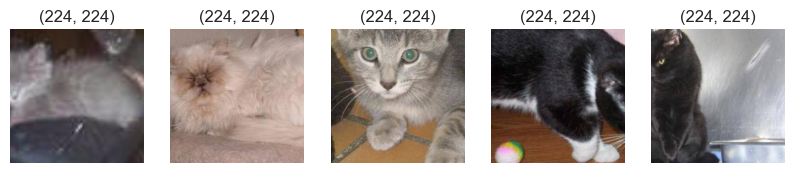

In [5]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in list_of_images:
    if i > 5:
        break
    img = load_img(data_path + image)
    pyplot.subplot(1, 5, i)
    pyplot.imshow(img)
    pyplot.title(str(img.size))
    pyplot.axis("off")
    i += 1

pyplot.show()

In [6]:
images = zeros((number_of_images, 224, 224, 3))
labels = zeros((number_of_images, 1))

In [7]:
for image_number, image_path in enumerate(list_of_images):
    img = Image.open(data_path + image_path)
    img = asarray(img)
    img = img / img.max()
    images[image_number] = img
    labels[image_number] = 0 if "cat" in image_path else 1

In [8]:
print(labels)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [9]:
labels = to_categorical(labels)

In [10]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
images.shape

(2000, 224, 224, 3)

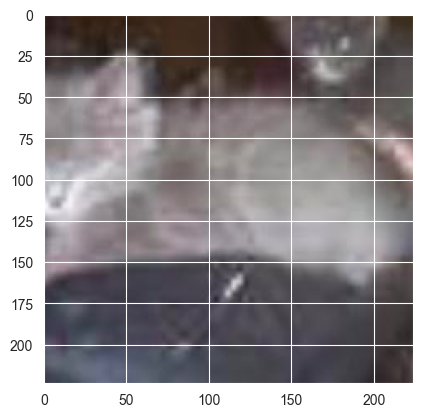

In [12]:
pyplot.imshow(images[0])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600, 2), (400, 2))

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 55s 1us/step


In [18]:
# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False

In [19]:
# Add layers using calls:
x = model.output  # Get the output of the InceptionV3 base
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [20]:
# Create a new Functional model with these layers:
model = Model(inputs=model.input, outputs=predictions)

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - accuracy: 0.5284 - loss: 0.7882
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step - accuracy: 0.5912 - loss: 0.6640
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.6310 - loss: 0.6405
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.6288 - loss: 0.6467
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.6539 - loss: 0.6262
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 538ms/step - accuracy: 0.6144 - loss: 0.6388
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.6348 - loss: 0.6368
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.6531 - loss: 0.6171
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.6465 - loss: 0.6264
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.6378 - loss: 0.6289
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - accuracy: 0.6794 - loss: 0.5996
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16

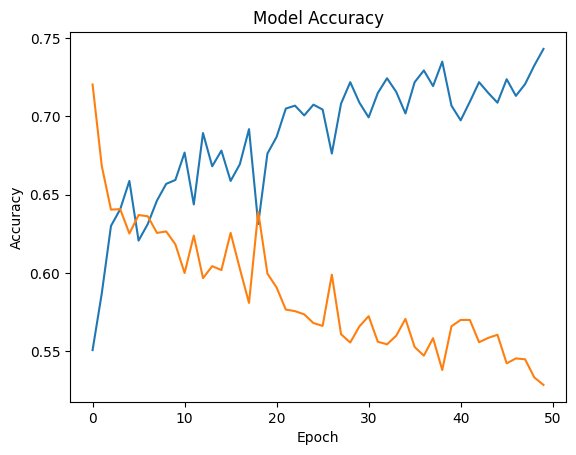

In [23]:
pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["loss"])
pyplot.title("Model Accuracy")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epoch")
pyplot.show()

In [24]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 342ms/step - accuracy: 0.6741 - loss: 0.5636


[0.5664899945259094, 0.6899999976158142]

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict = argmax(y_predict, axis=1)
y_test_argmax = argmax(y_test, axis=1)

In [ ]:
cm = confusion_matrix(y_test_argmax, y_predict)
heatmap(cm, annot=True, fmt="d")

In [ ]:
cr = classification_report(y_test_argmax, y_predict)
print(cr)